To inspect individuals ROIs (individual cells) for experimentally determined donor-lifetime trace and best-fit. 

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


### Set the location of the results data and where to save the figures
You can find the location of the results data on [line 36 of analyse_data.py](https://github.com/Jalink-lab/pde-screen-2021/blob/main/analyse_data.py#L36)

In [2]:
WRITE_PATH = Path('C:\\', 'Temp', 'Screening_Result')
SAVE_FIGURE = [True, Path('C:\\', 'Temp', 'Screening_Figures')]

In [3]:
def fit_function(x, a, b, c, d):
    return a + b / (1 + np.exp(-4 * (x - d)/c))

def whaterror(error):
    errorlist = ["ROI does not excist",
                 "ROI smaller than min_pix",
                 "ROI mean intensity smaller than min_int",
                 "ROI intensitytrace has one or more zeros",
                 "Trace starts outside of the stabilityrange",
                 "Trace has NaNs",
                 "Trace gave a runtime error in the fit",
                 "Trace error on the rate is bigger than maxerror",
                 "Fit does not start around the start of the data"]
    errors = []
    for i in range(len(errorlist) + 1):
        if int(error) & (1 << i):
            errors.append(errorlist[i])
    return errors

In [4]:
fit = pd.read_csv(Path(WRITE_PATH,'2020','01','07','chemical','results','D03_fit.csv'))
fit = fit.replace([np.inf, -np.inf], np.nan)
lifetimetraces = np.loadtxt(Path(WRITE_PATH,'2020','01','07','chemical','results','D03_tau.csv'))
errors = np.loadtxt(Path(WRITE_PATH,'2020','01','07','chemical','results','D03_errors.csv'))
wellName = 'D03'
condition=fit['condition'][0]
frameinterval = fit['frameinterval(s)'][0]
ntime = lifetimetraces.shape[1]
fit_sel = fit[fit['breakdown_time(s)'] > 2] 
fit_noerrors = fit_sel[fit_sel['error']==0]
fit_hasdarkframe = fit_sel[fit_sel['error']==8]
fit_errorfree = pd.concat([fit_noerrors,fit_hasdarkframe])
print('There are '+ str(len(lifetimetraces)) +' individual cells in the FOV of well '+wellName)
print('There are '+ str(len(fit_errorfree)) +' individual cells had no fitting errors and can be included in final analysis. From these for '+ str(len(fit_hasdarkframe)) +' ROIs the dark frame had to be cured.')
print('Frameinterval was '+ str(round(frameinterval,1)) + ' seconds.')

There are 150 individual cells in the FOV of well D03
There are 134 individual cells had no fitting errors and can be included in final analysis. From these for 0 ROIs the dark frame had to be cured.
Frameinterval was 2.0 seconds.


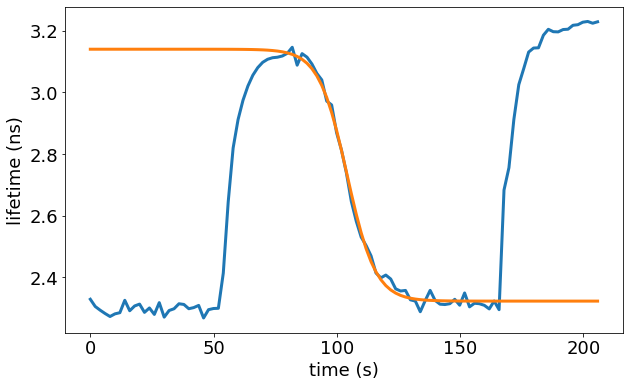

In [5]:
# For figure 6 select ROI 47 (cell nr 48)
trace_id = 47
fitrange = np.zeros(shape=2, dtype=int)
lifetimetraces_selected = lifetimetraces[errors==0] #>>>>> this is needed to account for rejecting bad traces prior to fitting
mean_trace = np.mean(lifetimetraces_selected, axis=0)
d_mean_trace = np.diff(mean_trace)
fitrange[0] = np.argmax(mean_trace[0:int(150 / frameinterval)])  # maximum in the first 150 seconds
fitrange[1] = ntime
fit_vals= fit.loc[trace_id,:]
xdat = np.arange(0, ntime * frameinterval, frameinterval)
ydat = lifetimetraces[trace_id]   
yfit = fit_function(xdat,fit_vals['start(ns)'],fit_vals['range(ns)'],fit_vals['breakdown_time(s)'],fit_vals['midpoint(s)'])
xdat_selected = xdat[fitrange[0]:fitrange[1]]
ydat_selected = ydat[fitrange[0]:fitrange[1]]
yfit_selected = yfit[fitrange[0]:fitrange[1]]
fig = plt.figure(figsize = [10,6])
title = 'Figure 6B'
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.ylabel('lifetime (ns)')
plt.xlabel('time (s)')
plt.plot(xdat, ydat, label="exp data", linewidth=3)
plt.plot(xdat, yfit, label='fit', linewidth=3)
plt.show()
if SAVE_FIGURE[0]:
    SAVE_FIGURE[1].mkdir(parents=True, exist_ok=True)
    fig.savefig(Path(SAVE_FIGURE[1], title+'.svg'),dpi=600)

In [6]:
print("Package versions used to generate this jupyter notebook:")
%watermark --iversions

Package versions used to generate this jupyter notebook:
numpy  1.19.2
pandas 1.2.0

